# Phase 2: Data Summarization and Preprocessing

## 1. Data Analysis

In [1]:
import os
import pandas as pd

if os.path.exists("Dataset/Raw_dataset.csv"):
    df = pd.read_csv("Dataset/Raw_dataset.csv")
else:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv("/content/drive/MyDrive/Raw_dataset.csv")

df.head()

Mounted at /content/drive


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


The dataset was successfully loaded into Google Colab environment. A preview of the first five rows is displayed to verify that the data has been read correctly.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df.shape

(2149, 35)

The dataset contains 2149 instances (rows) and 35 attributes (columns). This satisfies the project requirement of having more than 500 rows and more than 10 attributes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

The dataset contains a mix of numerical and categorical attributes. All attributes appear to have valid data types, and no missing values are observed at this stage

In [5]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The statistical summary shows the distribution of numerical attributes.
For example, the average age is approximately 74.9 years with a standard deviation of 8.99, indicating moderate variability.
BMI has a mean of 27.65, which falls in the overweight range.
Some attributes such as AlcoholConsumption and PhysicalActivity show wide ranges, indicating variability among patients.

In [6]:
df["Forgetfulness"].value_counts()

,count
Forgetfulness,
0,1501
1,648


The class label “Forgetfulness” has two classes:
Class 0: 1501 instances
Class 1: 648 instances
The dataset is slightly imbalanced, as class 0 represents a larger proportion of the data.

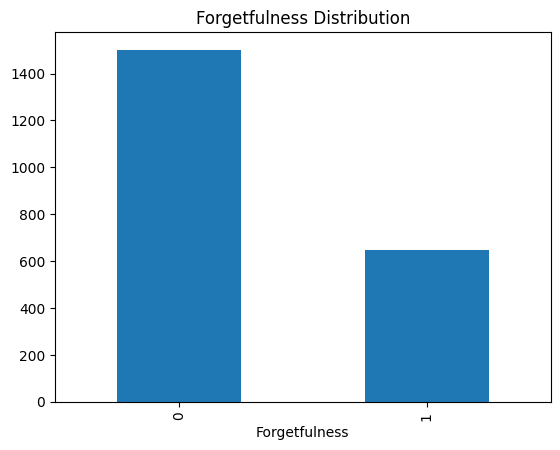

In [7]:
df["Forgetfulness"].value_counts().plot(kind="bar")
plt.title("Forgetfulness Distribution")
plt.show()

The bar plot clearly shows that class 0 appears more frequently than class 1.
This imbalance should be considered during model training to avoid biased predictions.

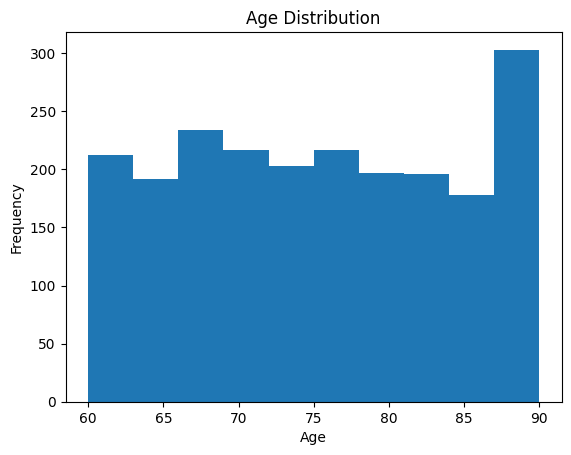

In [8]:
plt.hist(df["Age"], bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of patients’ ages ranging from 60 to 90 years.
The ages appear to be relatively evenly distributed across the range, with a slight concentration in the higher age groups (around 85–90 years).
This indicates that the dataset mainly represents elderly individuals, which is consistent with studies related to memory and Alzheimer’s risk.The distribution does not show extreme outliers, and the age range is realistic for the studied medical condition.
Since age is a numerical variable with a relatively wide range, normalization may be required during preprocessing.



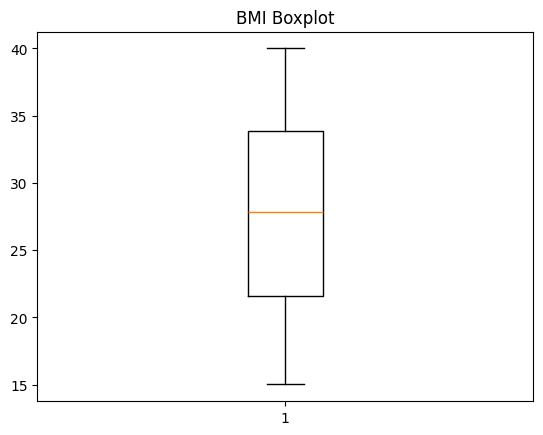

In [9]:
plt.boxplot(df["BMI"])
plt.title("BMI Boxplot")
plt.show()

The boxplot illustrates the distribution of BMI values among patients. The median BMI is approximately 27–28, which falls within the overweight range. The interquartile range (IQR) lies roughly between 21 and 34, indicating moderate variability in BMI values. The overall range extends from approximately 15 to 40. No extreme outliers are visibly detected; therefore, no immediate outlier removal is required at this stage. However, since BMI is a continuous numerical feature with a relatively wide range, scaling or normalization will be applied during preprocessing to ensure balanced feature contribution during model training.

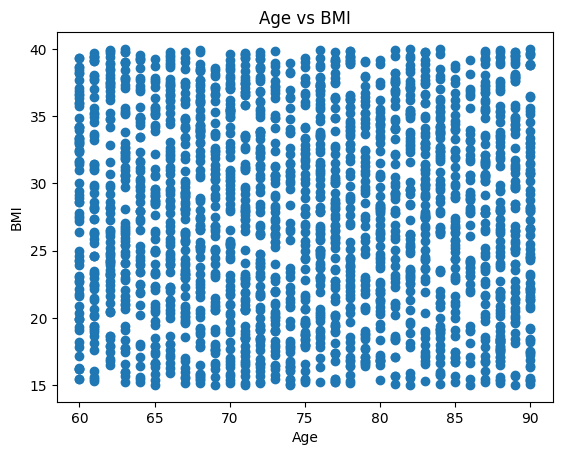

In [10]:
plt.scatter(df["Age"], df["BMI"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs BMI")
plt.show()

The scatter plot illustrates the relationship between Age and BMI. The points are widely distributed without a clear linear trend, indicating no strong linear correlation between the two variables. This suggests that age does not directly influence BMI in a linear manner. A correlation coefficient will be calculated to quantitatively confirm this observation.

In [11]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


The missing values analysis shows that there are no null values in any attribute of the dataset. Therefore, no data imputation or removal of records is required during preprocessing.

In [12]:
# Discretization of BMI into categories

df["BMI_Category"] = pd.cut(
    df["BMI"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

df["BMI_Category"].value_counts()

,count
BMI_Category,
Obese,871
Normal,544
Overweight,437
Underweight,297


BMI was discretized into categorical groups (Underweight, Normal, Overweight, Obese) using predefined medical thresholds.
This transformation was applied to improve interpretability and analyze risk patterns in categorical form.
The transformation was implemented using pd.cut() on the BMI attribute.
However, the continuous BMI variable was retained for model training to preserve numerical precision.

In [13]:
df = df.drop("PatientID", axis=1)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge,BMI_Category
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,1.725883,0,0,0,1,0,0,XXXConfid,Normal
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,2.592424,0,0,0,0,1,0,XXXConfid,Overweight
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,7.119548,0,1,0,1,0,0,XXXConfid,Underweight
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,1,6.481226,0,0,0,0,0,0,XXXConfid,Obese
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0.014691,0,0,1,1,0,0,XXXConfid,Normal


The PatientID attribute was removed since it represents an identifier and does not contribute to the prediction task.

In [14]:
y = df["Forgetfulness"]
X = df.drop("Forgetfulness", axis=1)

X = X.select_dtypes(include=["int64", "float64"])

X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0


The dataset was divided into input features (X) and the target variable (y), where Forgetfulness represents the class label. Only numerical attributes were retained to ensure compatibility with statistical feature selection and scaling methods applied in the preprocessing stage.

In [15]:
from sklearn.feature_selection import chi2
import pandas as pd

TARGET = "Forgetfulness"

nominal_cols = [
    "Gender","Ethnicity","EducationLevel","Smoking",
    "FamilyHistoryAlzheimers","CardiovascularDisease","Diabetes",
    "Depression","HeadInjury","Hypertension",
    "MemoryComplaints","BehavioralProblems","Confusion",
    "Disorientation","PersonalityChanges","DifficultyCompletingTasks"
]

X_nominal = df[nominal_cols].astype("category")
X_nominal = pd.get_dummies(X_nominal)

y = df[TARGET]

chi_scores, p_values = chi2(X_nominal, y)

chi_results = pd.DataFrame({
    "Feature": X_nominal.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)

chi_results.head(10)

,Feature,Chi2 Score,p-value
31,Disorientation_1,1.853966,0.173323
23,Hypertension_1,1.638542,0.200526
5,Ethnicity_3,1.307982,0.252760
4,Ethnicity_2,1.167246,0.279968
27,BehavioralProblems_1,0.989999,0.319743
0,Gender_0,0.886003,0.346563
1,Gender_1,0.864015,0.352617
13,FamilyHistoryAlzheimers_1,0.801924,0.370519
19,Depression_1,0.545705,0.460078
2,Ethnicity_0,0.503160,0.478115


The Chi-Square test was applied to evaluate the association between categorical features and the target variable (Forgetfulness). Features with p-value < 0.05 are considered statistically significant at α = 0.05.

Based on the results, all p-values were greater than 0.05, indicating that none of the categorical features show a statistically significant association with the target variable. However, the Chi-Square scores were used to rank features for further analysis.

In [16]:
import pandas as pd

X_selected = X
selected_features = X.columns

X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_selected_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0


The selected features were converted into a structured DataFrame to facilitate further preprocessing and maintain feature names for clarity and interpretability.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected_df)

X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
X_scaled_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Diagnosis
0,-0.212368,-1.012644,-0.700408,0.788833,-0.655225,-0.636784,0.565923,0.492525,-1.253593,1.119918,...,0.779037,0.497506,-0.512477,-0.431257,-1.104434,-0.508131,-0.433531,-0.421348,2.302619,-0.7397
1,1.567757,-1.012644,-0.700408,-1.422782,-0.114751,-0.636784,-0.954895,0.945093,-1.538442,0.056836,...,0.680297,0.704907,-0.512477,-0.431257,-0.810601,-0.508131,-0.433531,-0.421348,-0.434288,-0.7397
2,-0.212368,-1.012644,2.311955,-0.316974,-1.366428,-0.636784,1.653006,1.023896,-1.088855,1.487380,...,-0.859222,0.281813,-0.512477,-0.431257,0.724491,-0.508131,2.306640,-0.421348,2.302619,-0.7397
3,-0.101111,0.987514,-0.700408,-0.316974,0.851625,1.570391,0.376930,1.227995,0.839804,0.760833,...,-0.088723,1.343346,-0.512477,2.318805,0.508044,-0.508131,-0.433531,-0.421348,-0.434288,-0.7397
4,1.567757,-1.012644,-0.700408,-1.422782,-0.961607,-0.636784,1.461793,0.486696,-1.443293,-0.824566,...,-0.143712,0.333665,-0.512477,-0.431257,-1.684679,-0.508131,-0.433531,2.373334,2.302619,-0.7397


Standardization was performed using StandardScaler on the selected numerical features.
The transformation scales the data to have zero mean and unit variance.
This was necessary because the attributes have different numerical ranges.
Standardization ensures fair contribution of all features during model training and improves algorithm stability.

In [18]:
processed_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
processed_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Diagnosis,Forgetfulness
0,-0.212368,-1.012644,-0.700408,0.788833,-0.655225,-0.636784,0.565923,0.492525,-1.253593,1.119918,...,0.497506,-0.512477,-0.431257,-1.104434,-0.508131,-0.433531,-0.421348,2.302619,-0.7397,0
1,1.567757,-1.012644,-0.700408,-1.422782,-0.114751,-0.636784,-0.954895,0.945093,-1.538442,0.056836,...,0.704907,-0.512477,-0.431257,-0.810601,-0.508131,-0.433531,-0.421348,-0.434288,-0.7397,1
2,-0.212368,-1.012644,2.311955,-0.316974,-1.366428,-0.636784,1.653006,1.023896,-1.088855,1.487380,...,0.281813,-0.512477,-0.431257,0.724491,-0.508131,2.306640,-0.421348,2.302619,-0.7397,0
3,-0.101111,0.987514,-0.700408,-0.316974,0.851625,1.570391,0.376930,1.227995,0.839804,0.760833,...,1.343346,-0.512477,2.318805,0.508044,-0.508131,-0.433531,-0.421348,-0.434288,-0.7397,0
4,1.567757,-1.012644,-0.700408,-1.422782,-0.961607,-0.636784,1.461793,0.486696,-1.443293,-0.824566,...,0.333665,-0.512477,-0.431257,-1.684679,-0.508131,-0.433531,2.373334,2.302619,-0.7397,0


In [19]:
processed_df.to_csv("/content/drive/MyDrive/Preprocessed_dataset.csv", index=False)

The scaled features were merged with the target variable to form the final preprocessed dataset. The dataset was saved as “Preprocessed_dataset.csv” for use in Phase 3.